# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

In [2]:
df = pd.read_csv("Drugs_dataset.csv")

In [3]:
df1=df.copy()

In [4]:
from sklearn.pipeline import Pipeline
steps = []
pipeline = Pipeline(steps=steps)

# EDA

## Numerical

In [5]:
df.head(5)

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,Warfarin,Major
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,Warfarin,NaN
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,Warfarin,NaN
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,Warfarin,Minor
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,Warfarin,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sodium       380 non-null    int64  
 1   Tyramine     380 non-null    float64
 2   Potassium    380 non-null    int64  
 3   Fiber        380 non-null    float64
 4   Sugar        380 non-null    float64
 5   Vit K        380 non-null    float64
 6   Vit C        380 non-null    float64
 7   Protein      380 non-null    float64
 8   Calcium      380 non-null    float64
 9   Drug         380 non-null    object 
 10  Interaction  202 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 32.8+ KB


interaction null means none so needs to be fixed  

drugs and interaction needs to be label encoded

In [7]:
df.describe()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,520.571053,2.179737,386.142105,3.931579,11.826579,62.779737,26.834737,18.172368,109.975789
std,628.052409,6.443731,291.164337,4.259523,9.267918,113.863229,38.837149,11.695330,106.304402
min,10.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,110.000000,0.000000,200.000000,1.500000,5.000000,14.750000,5.925000,9.150000,48.000000
50%,275.000000,0.000000,320.000000,2.700000,10.000000,29.000000,15.000000,16.000000,84.500000
75%,630.000000,1.100000,480.000000,4.500000,17.000000,55.000000,30.000000,25.000000,128.250000
max,2850.000000,46.000000,1700.000000,25.000000,55.000000,820.000000,275.000000,66.000000,660.000000


data needs scaling because different values have different max

## Visualizations

### Distributions

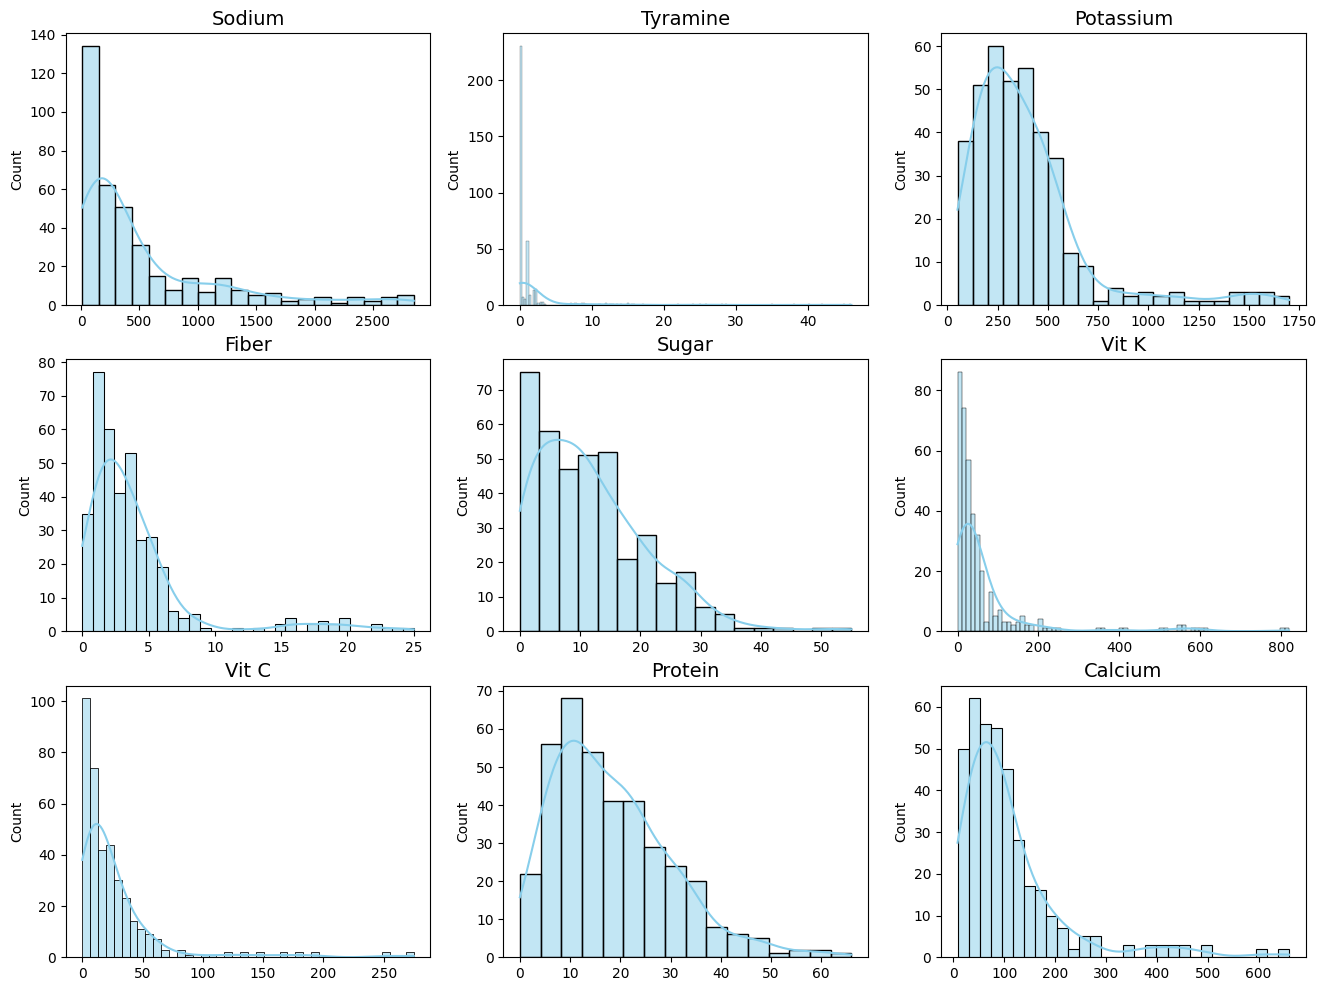

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

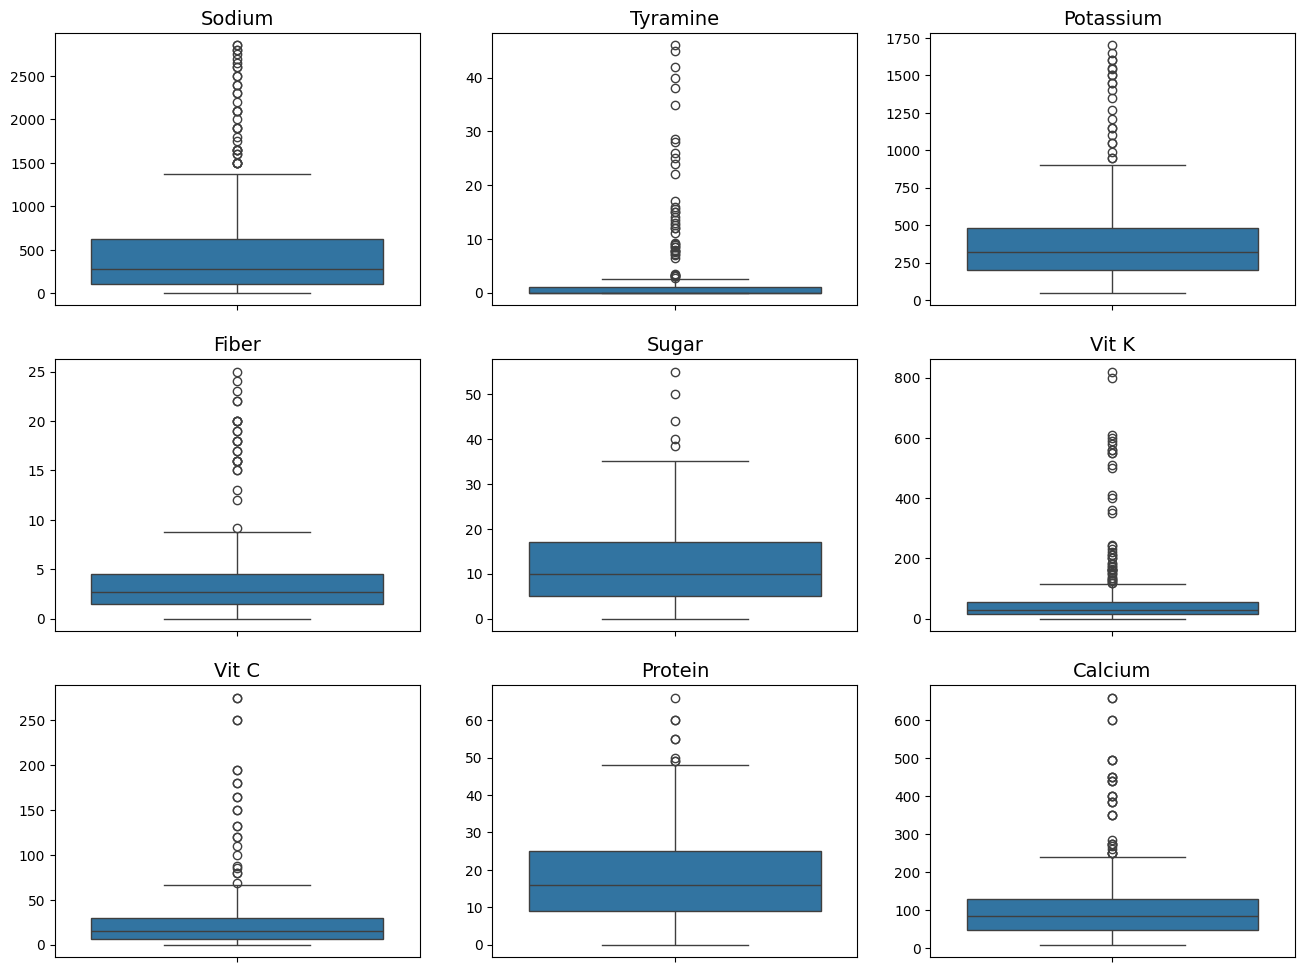

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-2]):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
plt.show()

All the data is right skewed, many outliers might need to test robust scaling, or fix skewness but data is too little to remove outliers

### Relationships

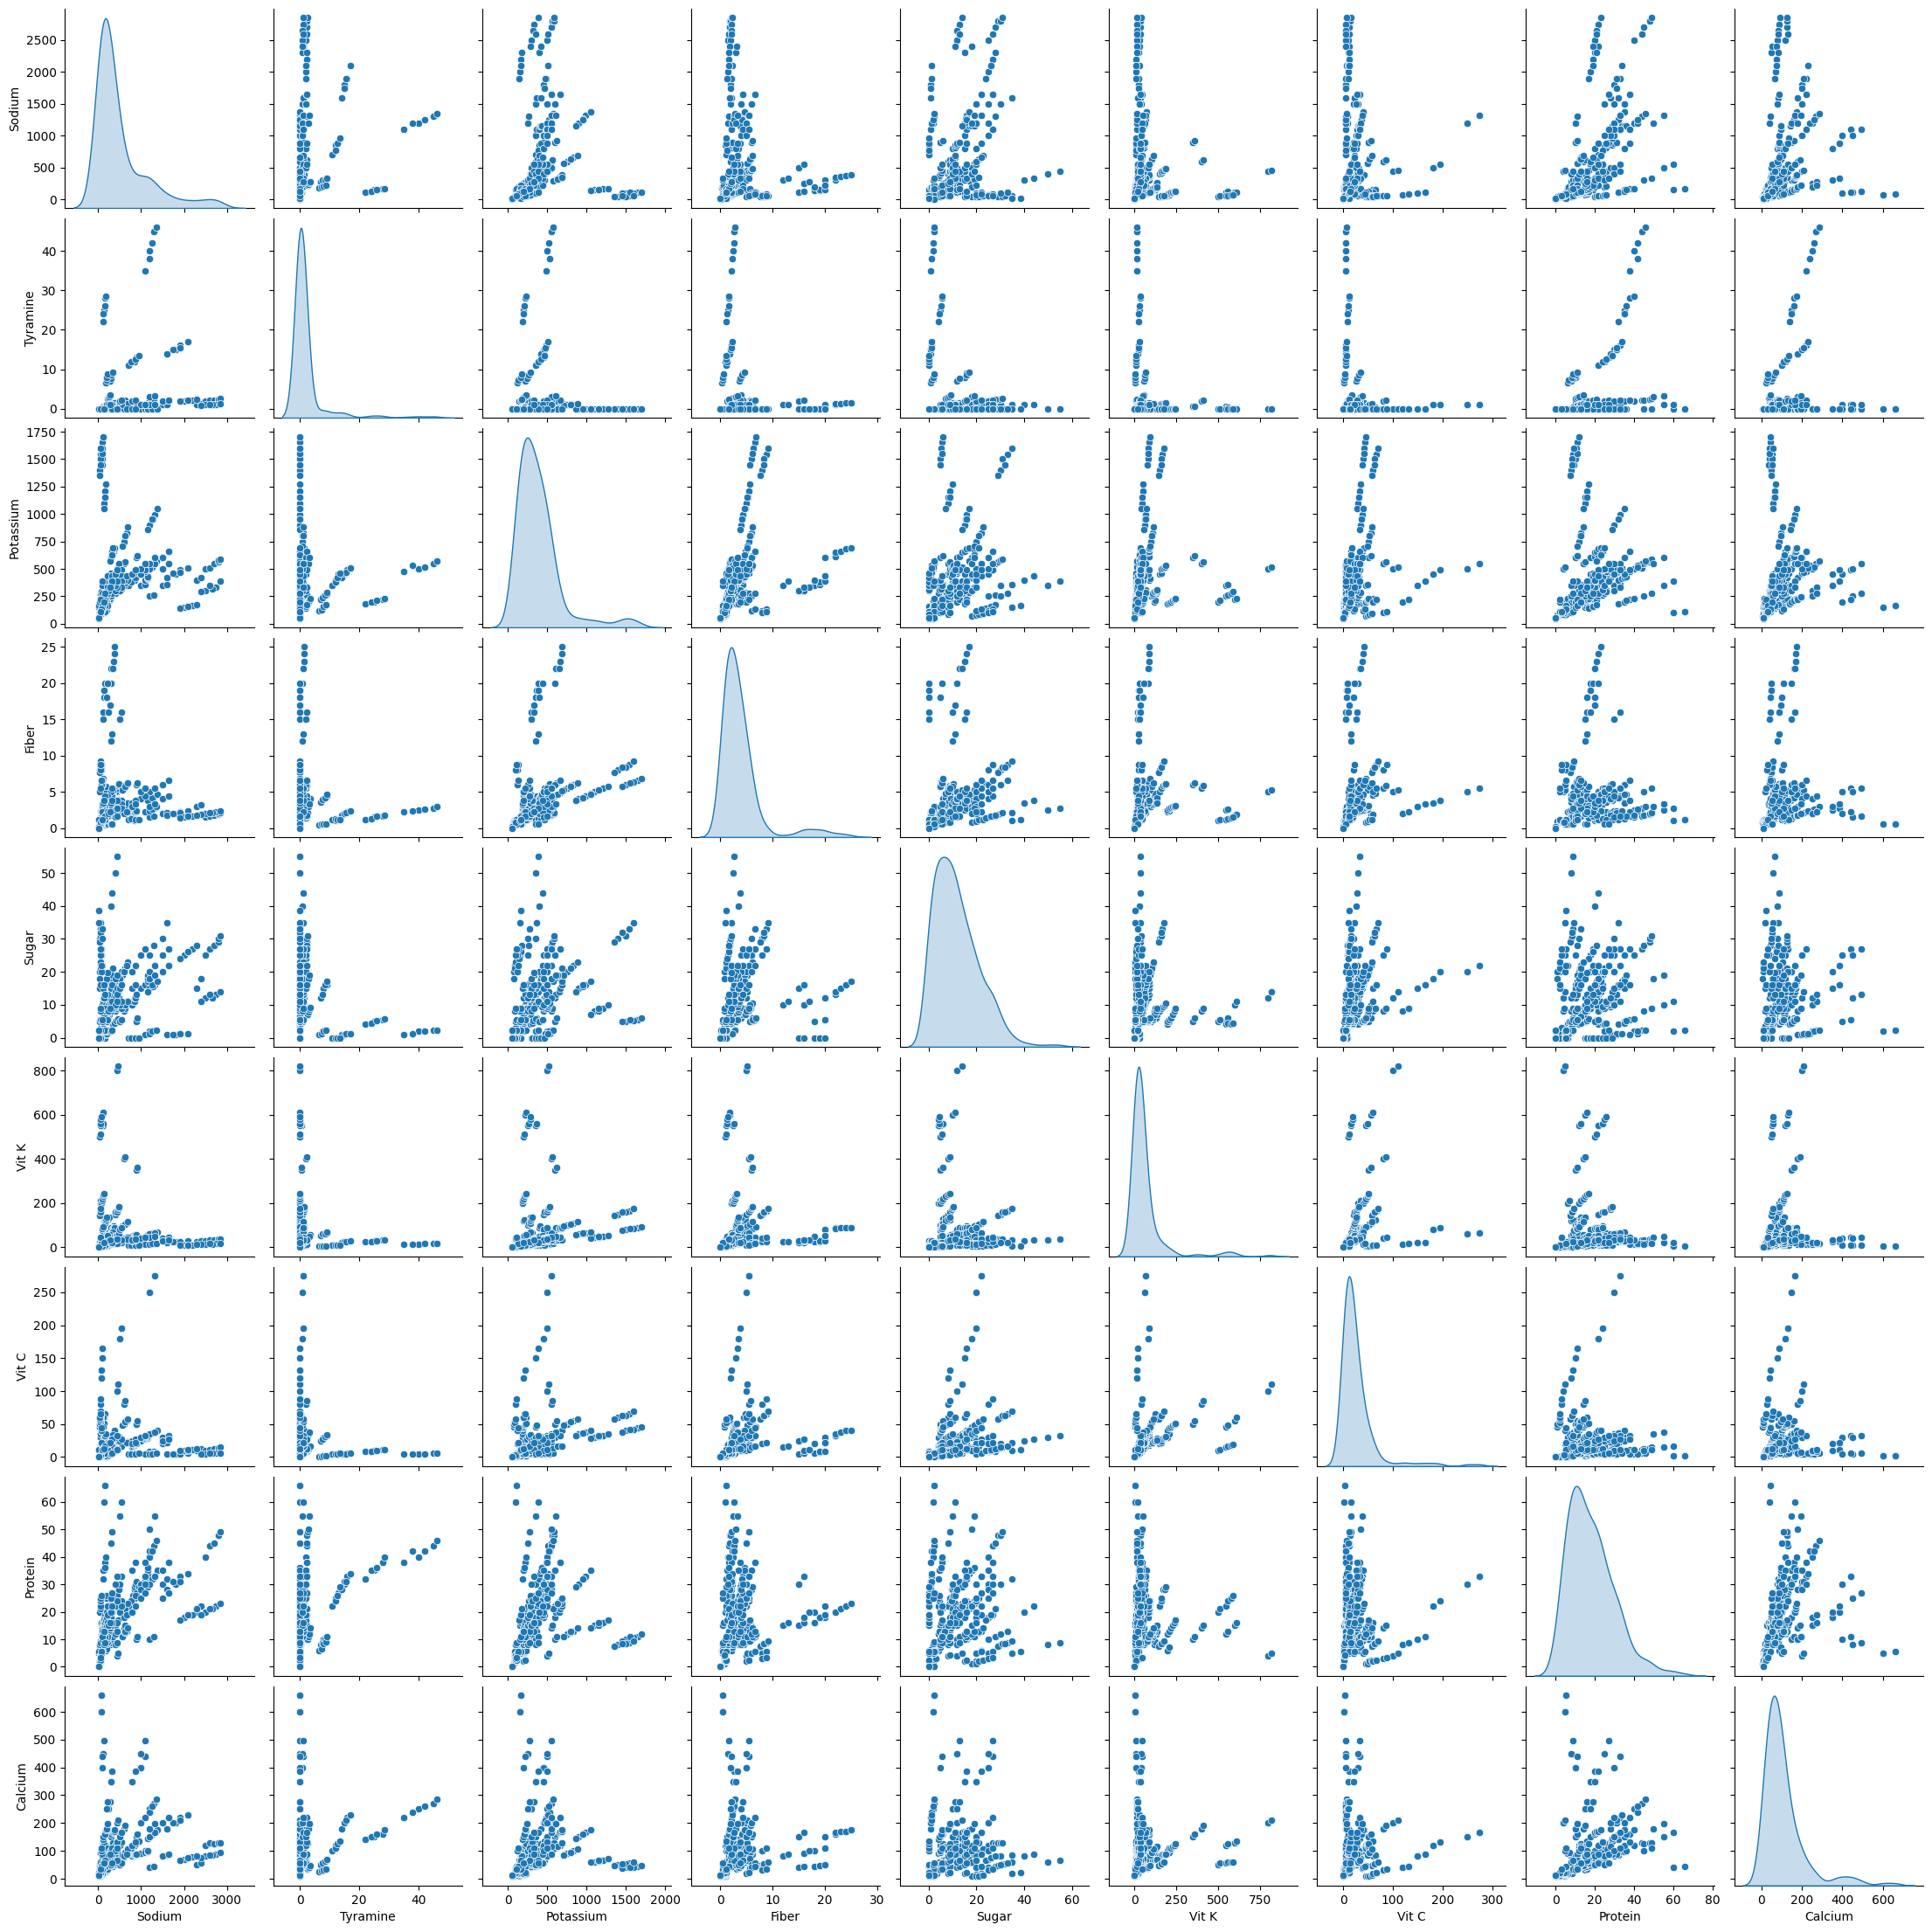

In [10]:
sns.pairplot(
    df,
    kind='scatter',
    diag_kind='kde',
)
plt.show()

Data Variables doesn't seem to hav much of a relationship

### Correlations

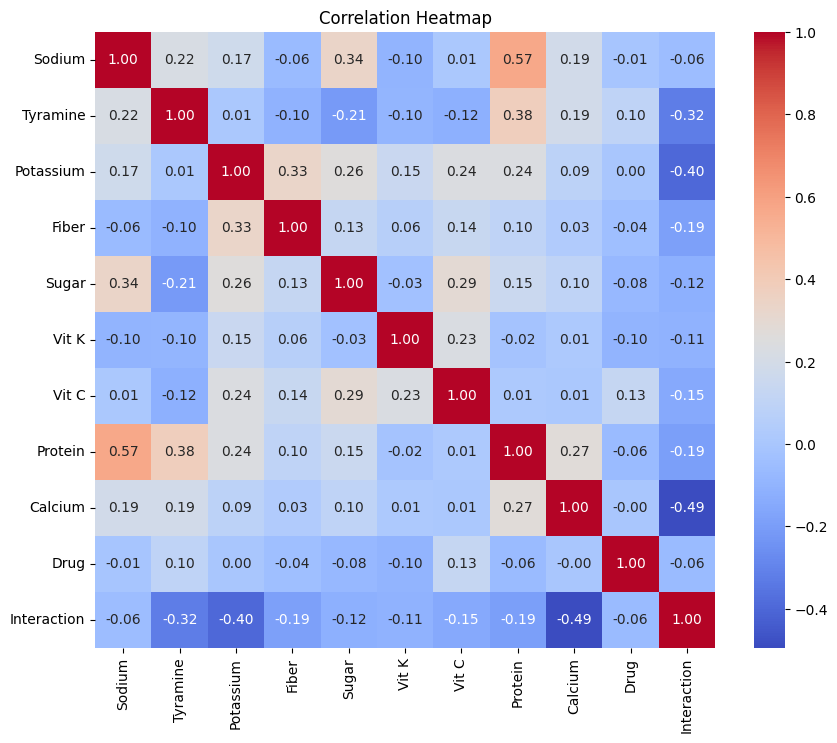

In [11]:
df_copy = df.copy()
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])
corr = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Protein and sodium have the highest correlation and also tyramine and Protein also fiber and potasium with label most correlated is calcium, potassium, tyramine

highest correlation with label is low we might need to do feature engineering to have a higher correlation

### Sampling Check

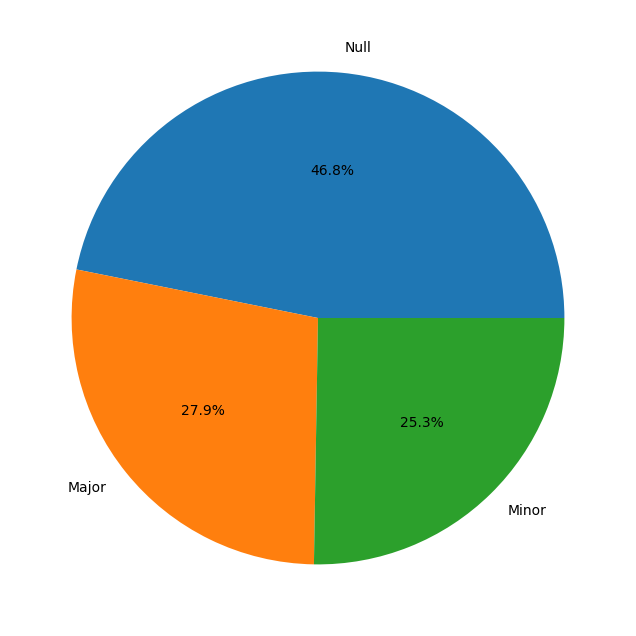

In [12]:
interaction_counts = df["Interaction"].fillna("Null").value_counts()
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=interaction_counts.index, autopct='%1.1f%%')
plt.show()

In [13]:
df["Interaction"].fillna("Null").value_counts()

,count
Interaction,
Null,178
Major,106
Minor,96


The dataset is imbalanced, with no interactions being the most common which reflect real world distribution. We may apply sampling techniques on the training for this imbalance but we will keep the test set unchanged for realistic evaluation.

### Drug Count

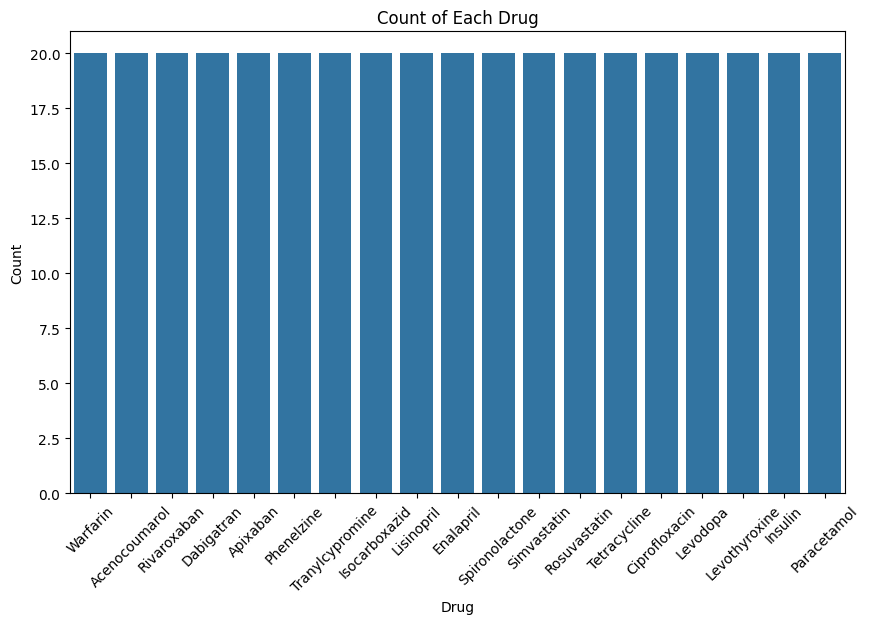

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Drug", order=df["Drug"].value_counts().index)
plt.title("Count of Each Drug")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [15]:
df["Drug"].value_counts()

,count
Drug,
Warfarin,20
Acenocoumarol,20
Rivaroxaban,20
Dabigatran,20
Apixaban,20
Phenelzine,20
Tranylcypromine,20
Isocarboxazid,20
Lisinopril,20


All drugs seems to be the same amount

# Preprocessing

### Missing Values

In [16]:
df.isna().sum()

,0
Sodium,0
Tyramine,0
Potassium,0
Fiber,0
Sugar,0
Vit K,0
Vit C,0
Protein,0
Calcium,0
Drug,0


In [17]:
df["Interaction"]=df["Interaction"].fillna("None")

In [18]:
df["Interaction"].value_counts()

,count
Interaction,
None,178
Major,106
Minor,96


###  Encoding

In [19]:
def map_interaction(label):
    mapping = {
        "None": 0,
        "Minor": 1,
        "Major": 2
    }
    return mapping[label]


In [20]:
df["Interaction"] = df["Interaction"].apply(map_interaction)

In [21]:
#drug_target_encoding = (
#    df.groupby("Drug")["Interaction"]
#   .mean()
#    .to_dict()
#)
#df["Drug"] = df["Drug"].map(drug_target_encoding)


In [22]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,Warfarin,2
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,Warfarin,0
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,Warfarin,0
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,Warfarin,1
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,Warfarin,0


### Fix Skewing

In [23]:
cols_to_transform = df.columns[:-2]
df[cols_to_transform] = np.log1p(df[cols_to_transform])

In [24]:
def log_numeric_columns(X):
    X = X.copy()
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    X[numeric_cols] = np.log1p(X[numeric_cols])
    return X

log_transformer = FunctionTransformer(
    log_numeric_columns,
    validate=False
)

pipeline.steps.append(('log', log_transformer))

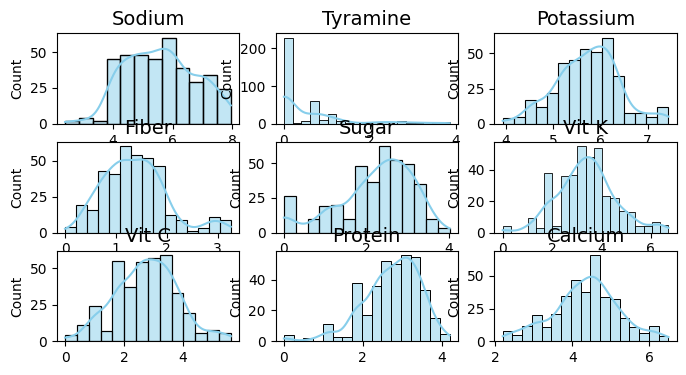

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 4))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

### **Train_test_split**

In [26]:
X = df
y = df["Interaction"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
drug_target_encoding = (
    X_train.groupby("Drug")["Interaction"]
    .mean()
    .to_dict()
)


In [29]:
drug_target_encoding

{'Acenocoumarol': 0.8421052631578947,
 'Apixaban': 0.26666666666666666,
 'Ciprofloxacin': 0.8,
 'Dabigatran': 0.23529411764705882,
 'Enalapril': 1.2777777777777777,
 'Insulin': 0.7857142857142857,
 'Isocarboxazid': 0.9285714285714286,
 'Levodopa': 1.0588235294117647,
 'Levothyroxine': 1.1176470588235294,
 'Lisinopril': 1.25,
 'Paracetamol': 0.5625,
 'Phenelzine': 1.0,
 'Rivaroxaban': 0.125,
 'Rosuvastatin': 0.17647058823529413,
 'Simvastatin': 1.0,
 'Spironolactone': 1.3333333333333333,
 'Tetracycline': 1.0666666666666667,
 'Tranylcypromine': 0.8823529411764706,
 'Warfarin': 0.7647058823529411}

In [30]:
drug_target_encoding['Phenelzine']+=1e-4

In [31]:
X_train["Drug"] = X_train["Drug"].map(drug_target_encoding)
X_test["Drug"] = X_test["Drug"].map(drug_target_encoding)


In [32]:
X_train['Drug'].value_counts()

,count
Drug,
0.842105,19
1.277778,18
0.764706,17
0.882353,17
1.117647,17
1.058824,17
0.176471,17
0.235294,17
1.250000,16


In [33]:
def map_drug_column(X):
    X = X.copy()
    if 'Drug' in X.columns:
        X['Drug'] = X['Drug'].map(drug_target_encoding)
    return X
drug_mapper = FunctionTransformer(map_drug_column, validate=False)
pipeline.steps.append(('drug_mapping', drug_mapper))

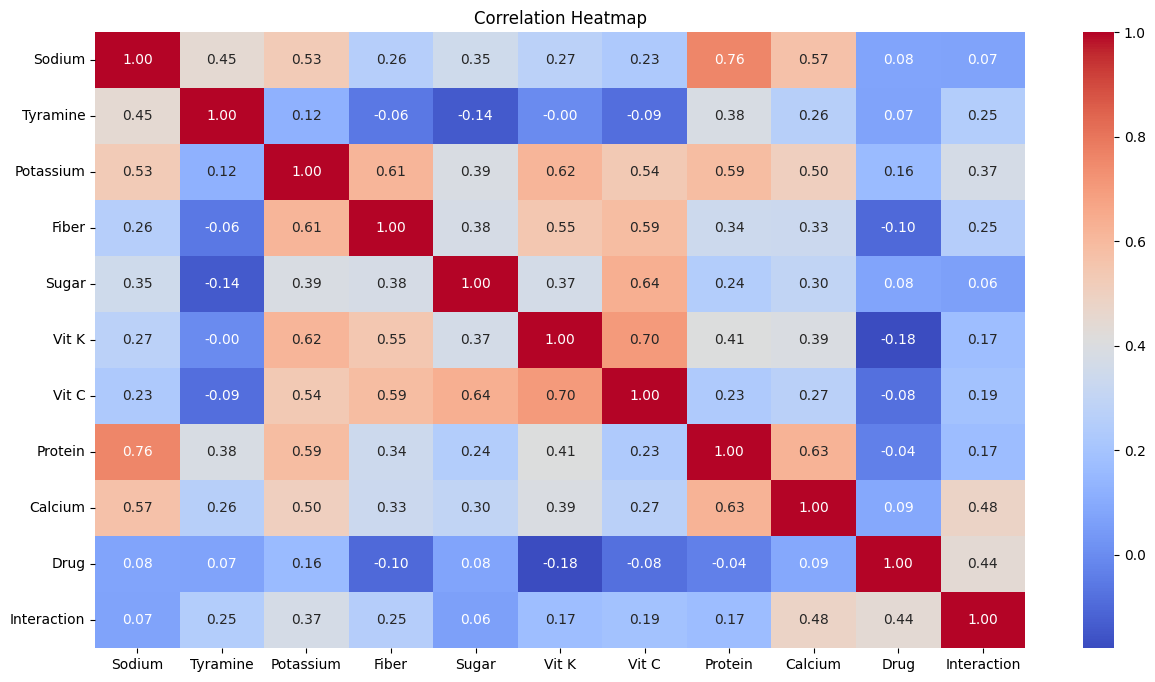

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
X_train=X_train.drop(["Interaction"], axis=1)
X_test=X_test.drop(["Interaction"], axis=1)



# Models

### Model 1

In [36]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [37]:
X_train1=X_train.copy()
y_train1=y_train.copy()
X_test1=X_test.copy()
y_test1=y_test.copy()

In [38]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [39]:
y_train1_cat = to_categorical(y_train1, num_classes=3)
y_test1_cat = to_categorical(y_test1, num_classes=3)

In [40]:
X_train1.shape[1]

10

In [79]:
ANN = Sequential()

ANN.add(Input(shape=(X_train1.shape[1],)))
ANN.add(Dense(32, activation='relu'))
ANN.add(Dropout(0.3))

ANN.add(Dense(3, activation='softmax'))

In [80]:
ANN.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.015), metrics=['accuracy'])
ANN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [82]:
history = ANN.fit(X_train1, y_train1_cat, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.3019 - loss: 1.3720 - val_accuracy: 0.5738 - val_loss: 1.0116
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5214 - loss: 1.0132 - val_accuracy: 0.6721 - val_loss: 0.8281
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6028 - loss: 0.8394 - val_accuracy: 0.7213 - val_loss: 0.7184
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7062 - loss: 0.7055 - val_accuracy: 0.7377 - val_loss: 0.6412
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7528 - loss: 0.5722 - val_accuracy: 0.8033 - val_loss: 0.5967
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7371 - loss: 0.5784 - val_accuracy: 0.8361 - val_loss: 0.5679
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7793 - loss: 0.5082 - val_accuracy: 0.8361 - val_loss: 0.5457
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8191 - loss: 0.5176 - val_accuracy: 0.8361 - val_loss: 0.5268

In [83]:
loss, accuracy = ANN.evaluate(X_test1, y_test1_cat)
print("Test Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9293 - loss: 0.3109
Test Accuracy: 0.9210526347160339


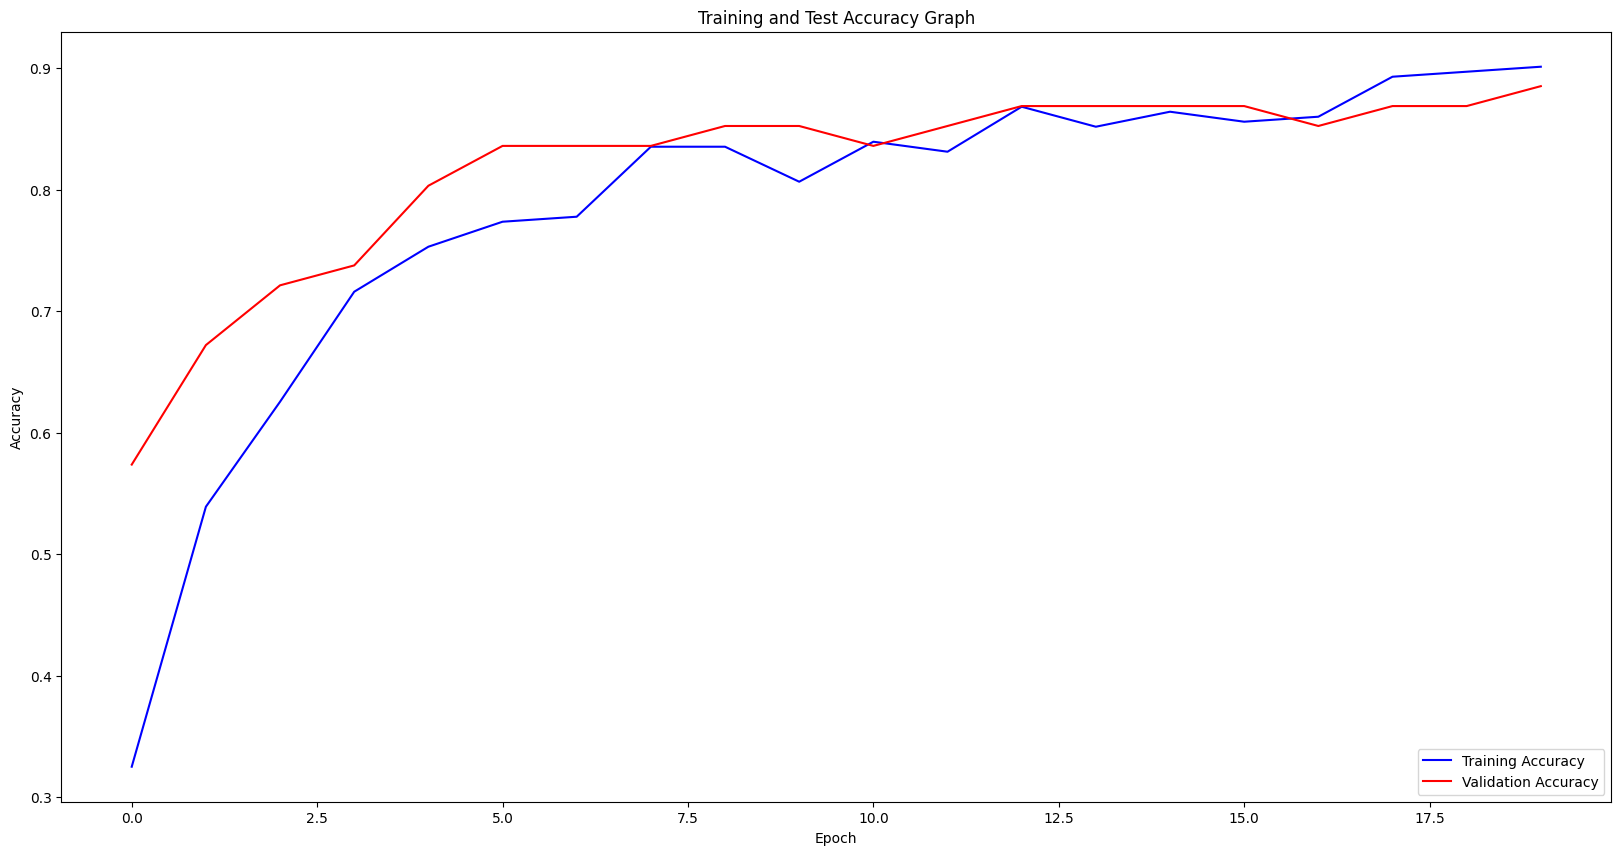

In [84]:
plt.figure(figsize=(20, 10))
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy Graph");

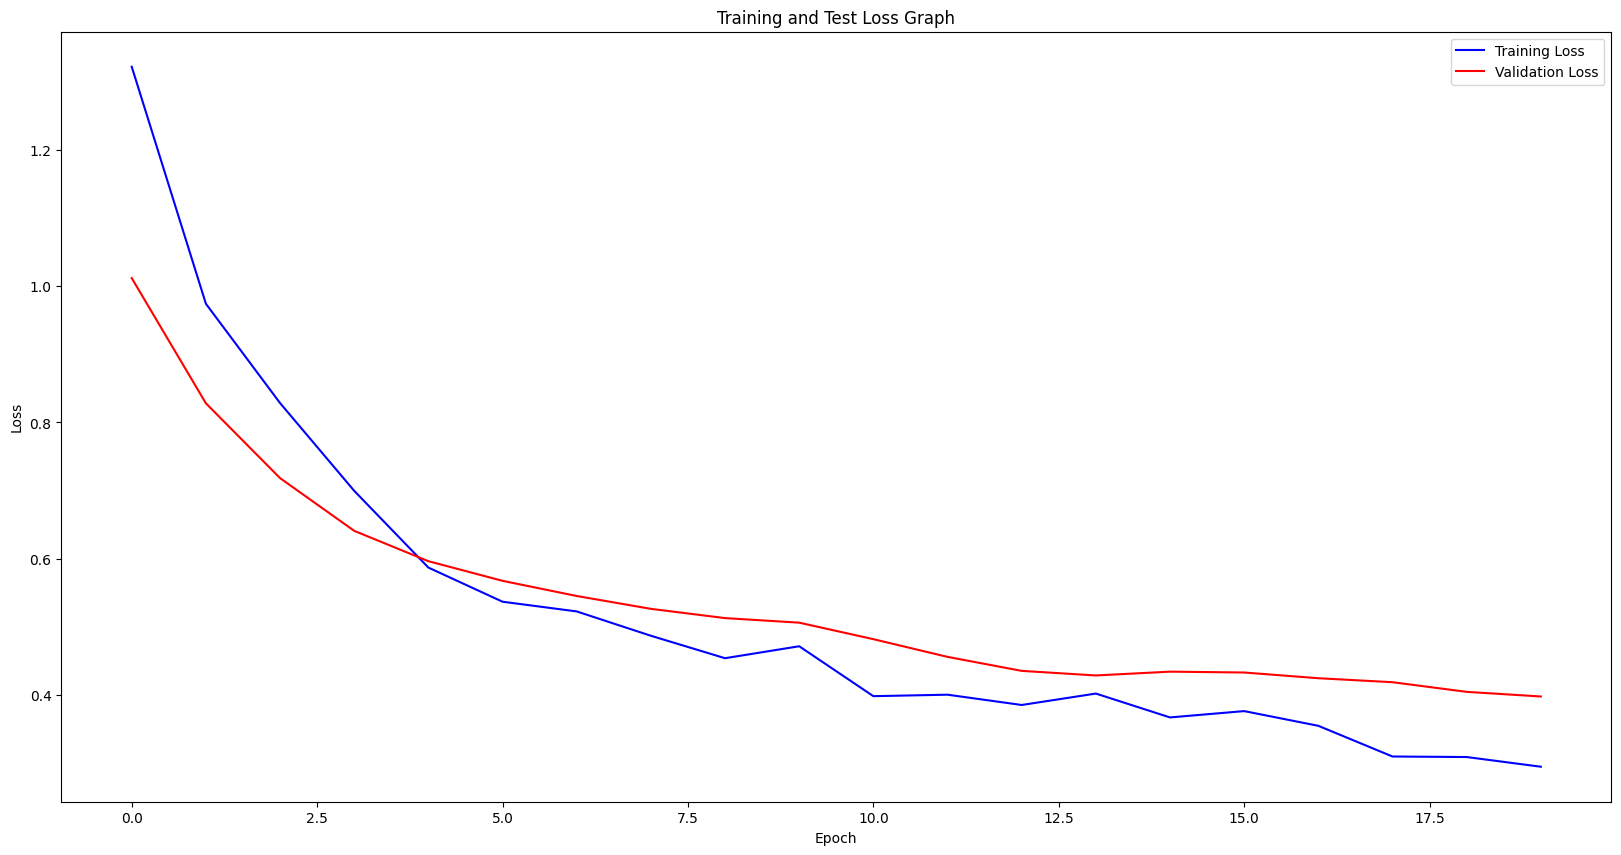

In [85]:
plt.figure(figsize=(20, 10))
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Graph");

### Model 2

In [48]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



In [49]:
X_train2=X_train.copy()
y_train2=y_train.copy()
X_test2=X_test.copy()
y_test2=y_test.copy()


In [50]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,Warfarin,2
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,Warfarin,0
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,Warfarin,0
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,Warfarin,1
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,Warfarin,0


In [51]:
#X_train2["CalciumPotassiumSodiumIndex"] = X_train2["Calcium"] * X_train2["Potassium"] / (X_train2["Sodium"] + 1e-4)
#X_test2["CalciumPotassiumSodiumIndex"] = X_test2["Calcium"] * X_test2["Potassium"] / (X_test2["Sodium"] + 1e-4)

#X_train2['HighSugarLowVitamin'] = ((X_train2["Sugar"] > X_train2["Sugar"].quantile(0.5)).astype(int) *((X_train2["Vit K"] + X_train2["Vit C"]) < (X_train2["Vit K"] + X_train2["Vit C"]).quantile(0.5)).astype(int))
#X_test2['HighSugarLowVitamin'] = ((X_test2["Sugar"] > X_train2["Sugar"].quantile(0.5)).astype(int) *((X_test2["Vit K"] + X_test2["Vit C"]) < (X_train2["Vit K"] + X_train2["Vit C"]).quantile(0.5)).astype(int))

#X_train2['LowSugarHighFiber'] = ((X_train2['Sugar'] < X_train2['Sugar'].quantile(0.4)).astype(int)*(X_train2['Fiber'] > X_train2['Fiber'].quantile(0.6)).astype(int))
#X_test2['LowSugarHighFiber'] = ((X_test2['Sugar'] < X_train2['Sugar'].quantile(0.4)).astype(int)*(X_test2['Fiber'] > X_train2['Fiber'].quantile(0.6)).astype(int))


#X_train2['HighVitaminC'] = (X_train2['Vit C'] > X_train2['Vit C'].quantile(0.7)).astype(int)
#X_test2['HighVitaminC'] = (X_test2['Vit C'] > X_train2['Vit C'].quantile(0.7)).astype(int)



In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train2)

In [54]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,Warfarin,2
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,Warfarin,0
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,Warfarin,0
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,Warfarin,1
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,Warfarin,0


In [55]:
knn_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_knn = {
    'knn__n_neighbors': [3,5,7,9,11],
    'knn__weights': ['distance','uniform'],
    'knn__p': [1,2]
    }


In [56]:
grid = GridSearchCV(
    knn_pipe,
    param_knn,
    cv=3,
    scoring='accuracy')

grid.fit(X_train2, y_train2)
best_knn = grid.best_estimator_

y_train_pred = best_knn.predict(X_train2)
y_test_pred = best_knn.predict(X_test2)

print("Training Accuracy:", accuracy_score(y_train2, y_train_pred))
print(classification_report(y_train2, y_train_pred))

print("\n")
print("Testing Accuracy:", accuracy_score(y_test2, y_test_pred))
print(classification_report(y_test2, y_test_pred))


Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        85

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304



Testing Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      0.95      0.95        19
           2       1.00      0.95      0.98        21

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



In [57]:

mlp_model=MLPClassifier(
        hidden_layer_sizes=(120,80,60),
        max_iter=500,
        random_state=42
    )

mlp_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('mlp', mlp_model
    )
])
mlp_pipe.fit(X_train2, y_train2)

y_train_pred = mlp_pipe.predict(X_train2)
y_test_pred = mlp_pipe.predict(X_test2)

print("Training Accuracy:", accuracy_score(y_train2, y_train_pred))
print(classification_report(y_train2, y_train_pred))
print("\nTesting Accuracy:", accuracy_score(y_test2, y_test_pred))
print(classification_report(y_test2, y_test_pred))

Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        85

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304


Testing Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.98      0.97      0.97        76



In [58]:
knn_pipe_for_stack = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', best_knn.named_steps['knn'])
])
mlp_pipe_for_stack = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_model)
])

stack_model = StackingClassifier(
    estimators=[
        ('knn', knn_pipe_for_stack)
    ],
    final_estimator=mlp_pipe_for_stack,
    passthrough=False
)

stack_model.fit(X_train2, y_train2)
y_train_pred = stack_model.predict(X_train2)
y_test_pred = stack_model.predict(X_test2)

print("Training Accuracy:", accuracy_score(y_train2, y_train_pred))
print(classification_report(y_train2, y_train_pred))

print("\nTesting Accuracy:", accuracy_score(y_test2, y_test_pred))
print(classification_report(y_test2, y_test_pred))



Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        85

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304


Testing Accuracy: 0.9868421052631579
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        21

    accuracy                           0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76



In [59]:
confusion_matrix(y_test, y_test_pred)

array([[36,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 21]])

## Model 3 (Deployed)

In [60]:
df2 = df.copy()
df2

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,Warfarin,2
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,Warfarin,0
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,Warfarin,0
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,Warfarin,1
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,Warfarin,0
...,...,...,...,...,...,...,...,...,...,...,...
375,5.111988,0.000000,5.620401,1.686399,2.639057,3.332205,2.833213,2.282382,4.204693,Paracetamol,1
376,5.620401,0.741937,5.802118,1.163151,2.282382,3.526361,3.135494,2.833213,4.488636,Paracetamol,0
377,4.204693,0.000000,4.709530,2.282382,3.332205,3.806662,4.488636,1.458615,3.526361,Paracetamol,1
378,6.089045,0.000000,6.206576,0.955511,2.484907,3.663562,2.484907,3.526361,4.709530,Paracetamol,0


In [61]:
def create_features(data):
    data["calcium_drug"] = data["Calcium"] * data["Drug"]
    data["ca_protein_diff"] = data["Calcium"] - data["Protein"]
    data["ca_po_mul"] = data["Calcium"] * data["Potassium"]
    data["Tyr_Drug_mul"] = data["Tyramine"] * data["Drug"]
    return data


In [62]:
feature_creator = FunctionTransformer(create_features, validate=False)
pipeline.steps.append(('feature_creation', feature_creator))

In [63]:
X_train_eng = create_features(X_train)
X_test_eng = create_features(X_test)

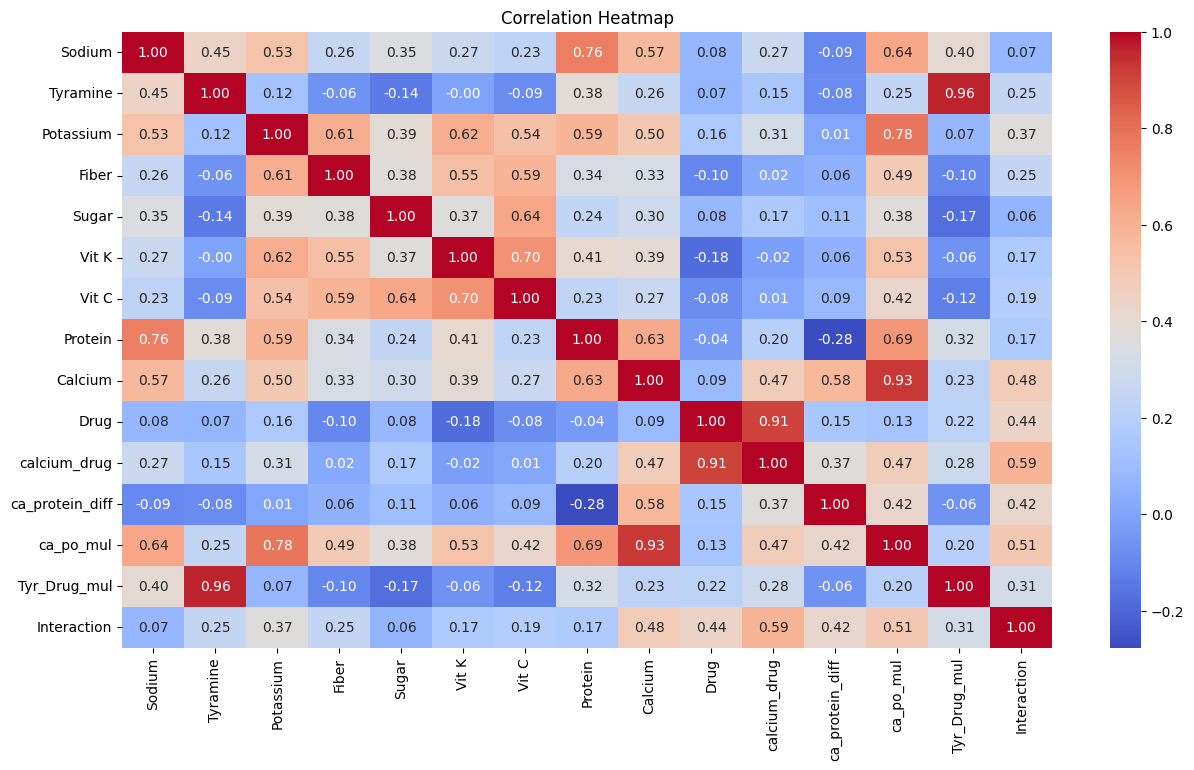

In [64]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.concat([X_train_eng,y_train], axis =1).corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_eng)
X_test_scaled = scaler.transform(X_test_eng)

pipeline.steps.append(('scaler', scaler))

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
svm = SVC(probability=True, random_state=42)
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear'],
    'class_weight': ['balanced', None]
}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    svm, params, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1
)
grid.fit(X_train_scaled, y_train)
print(f"Best Score: {grid.best_score_:.4f}")
print(f"Best Params: {grid.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Score: 0.9573
Best Params: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}


In [67]:
svm_best = grid.best_estimator_
y_train_pred = svm_best.predict(X_train_scaled)
y_test_pred = svm_best.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("\n")



Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        85

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

Testing Accuracy: 0.9868421052631579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21

    accuracy                           0.99        76
   macro avg       0.98      0.98      0.98        76
weighted avg       0.99      0.99      0.99        76





In [68]:
pipeline.steps.append(('model', svm_best))

In [69]:
for name, step in pipeline.steps:
    print(name, "->", step)

log -> FunctionTransformer(func=<function log_numeric_columns at 0x7e99dc9d63e0>)
drug_mapping -> FunctionTransformer(func=<function map_drug_column at 0x7e99eabf8a40>)
feature_creation -> FunctionTransformer(func=<function create_features at 0x7e9957d3d1c0>)
scaler -> StandardScaler()
model -> SVC(C=100, class_weight='balanced', probability=True, random_state=42)


In [70]:
test_data = pd.DataFrame({
    'Sodium': [1],
    'Tyramine': [1],
    'Potassium': [4],
    'Fiber': [1],
    'Sugar': [2],
    'Vit K': [3],
    'Vit C': [1],
    'Protein': [2],
    'Calcium': [10],
    'Drug': ['Warfarin']
})
predictions = pipeline.predict(test_data)
print(predictions)

[2]


In [71]:
import joblib

joblib.dump(pipeline, "svm_full_pipeline.joblib")

['svm_full_pipeline.joblib']